<a href="https://colab.research.google.com/github/hsnam95/class2022Spring/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Construct a DataFrame

In [1]:
import pandas as pd  # Import the package

# Some input data - a small sample of the iris dataset
data = {
    'sepal_length': [6.9, 6.9, 4.8, 5.4, 4.6],
    'sepal_width': [3.2, 3.1, 3.4, 3.0, 3.6],
    'petal_length': [5.7, 5.1, 1.9, 4.5, 1.0],
    'petal_width': [2.3, 2.3, 0.2, 1.5, 0.2],
    'species': ['virginica', 'virginica', 'setosa', 'versicolor', 'setosa']
}

df = pd.DataFrame(data)

df # Typing a variable at the end of a cell will print it out

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.9,3.2,5.7,2.3,virginica
1,6.9,3.1,5.1,2.3,virginica
2,4.8,3.4,1.9,0.2,setosa
3,5.4,3.0,4.5,1.5,versicolor
4,4.6,3.6,1.0,0.2,setosa


#### Indexes

In [3]:
df.index  # Access the index

RangeIndex(start=0, stop=5, step=1)

In [6]:
# Change the index
df.index = [2, 3, 4, 5, 6]
print(df.index)  # Access the index
df

Int64Index([2, 3, 4, 5, 6], dtype='int64')


,sepal_length,sepal_width,petal_length,petal_width,species
2,6.9,3.2,5.7,2.3,virginica
3,6.9,3.1,5.1,2.3,virginica
4,4.8,3.4,1.9,0.2,setosa
5,5.4,3.0,4.5,1.5,versicolor
6,4.6,3.6,1.0,0.2,setosa


In [7]:
df.index = df.index - 1  # Change the index
df.index  # Access the index

Int64Index([1, 2, 3, 4, 5], dtype='int64')

#### COLUMNS

In [8]:
df.columns  # Access the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
# Change the columns
df.columns = ['sepal_length', 'sepal_width', 
              'petal_length', 'petal_width', 'SPECIES']
print(df.columns)
df

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'SPECIES'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width,SPECIES
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica
3,4.8,3.4,1.9,0.2,setosa
4,5.4,3.0,4.5,1.5,versicolor
5,4.6,3.6,1.0,0.2,setosa


In [13]:
# Apply the `str.lower` function to every column
df.columns = map(str.lower, df.columns)
df.columns  # Access the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Accessing columns

In [14]:
# Access one column 
df.loc[:, 'sepal_length']

1    6.9
2    6.9
3    4.8
4    5.4
5    4.6
Name: sepal_length, dtype: float64

In [ ]:
# Access one column (short-hand)
df['sepal_length']

1    6.9
2    6.9
3    4.8
4    5.4
5    4.6
Name: sepal_length, dtype: float64

In [ ]:
# Access two columns
df.loc[:, ['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
1,6.9,3.2
2,6.9,3.1
3,4.8,3.4
4,5.4,3.0
5,4.6,3.6


In [ ]:
# Access two columns (short-hand)
df[['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
1,6.9,3.2
2,6.9,3.1
3,4.8,3.4
4,5.4,3.0
5,4.6,3.6


#### Accessing rows

In [ ]:
# Access one row 
df.loc[3, :]

sepal_length       4.8
sepal_width        3.4
petal_length       1.9
petal_width        0.2
species         setosa
Name: 3, dtype: object

In [ ]:
# Access two rows
df.loc[[3, 0], :]
# Note: `0` is not an index so it's value's are `NaN` (not a number), i.e. missing

In [17]:
# Access a range of rows
df.loc[2:5, :]

,sepal_length,sepal_width,petal_length,petal_width,species
2,6.9,3.1,5.1,2.3,virginica
3,4.8,3.4,1.9,0.2,setosa
4,5.4,3.0,4.5,1.5,versicolor
5,4.6,3.6,1.0,0.2,setosa


In [18]:
# Access rows by index location (number starting from zero)
df.iloc[0:2, :]

,sepal_length,sepal_width,petal_length,petal_width,species
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica


In [19]:
# Filter keeping only rows with `sepal_length` > 5
df[df.sepal_length > 5]

,sepal_length,sepal_width,petal_length,petal_width,species
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica
4,5.4,3.0,4.5,1.5,versicolor


In [20]:
# Filter keeping only rows with `sepal_length` > 5 (alternative syntax)
df.query("sepal_length > 5")

,sepal_length,sepal_width,petal_length,petal_width,species
1,6.9,3.2,5.7,2.3,virginica
2,6.9,3.1,5.1,2.3,virginica
4,5.4,3.0,4.5,1.5,versicolor


#### Reading data from disk

Pandas can read files directly from a file (even excel files) and will automatically try and infer as much as it can about the structure of the data)

``` python
filename = 'Your_filename_here.json'
df = pd.read_json(filename)

filename = 'Your_filename_here.csv'
df = pd.read_csv(filename)

# Requires `xlrd` package to be installed
filename = 'Your_filename_here.xlsx'
df = pd.read_excel(filename)
```

In [21]:
# You may need to manually tell pandas some things about your dataset
# Lots of options detailed in the docs... 
pd.read_csv?

#### Adding new columns

In [23]:
df['new_column'] = 1
df

,sepal_length,sepal_width,petal_length,petal_width,species,new_column
1,6.9,3.2,5.7,2.3,virginica,1
2,6.9,3.1,5.1,2.3,virginica,1
3,4.8,3.4,1.9,0.2,setosa,1
4,5.4,3.0,4.5,1.5,versicolor,1
5,4.6,3.6,1.0,0.2,setosa,1


In [24]:
df['new_column'] = [1, 2, 3, 4, 5]
df

,sepal_length,sepal_width,petal_length,petal_width,species,new_column
1,6.9,3.2,5.7,2.3,virginica,1
2,6.9,3.1,5.1,2.3,virginica,2
3,4.8,3.4,1.9,0.2,setosa,3
4,5.4,3.0,4.5,1.5,versicolor,4
5,4.6,3.6,1.0,0.2,setosa,5


In [25]:
df['new_column'] = df['sepal_length'] - df['petal_length']
df

,sepal_length,sepal_width,petal_length,petal_width,species,new_column
1,6.9,3.2,5.7,2.3,virginica,1.2
2,6.9,3.1,5.1,2.3,virginica,1.8
3,4.8,3.4,1.9,0.2,setosa,2.9
4,5.4,3.0,4.5,1.5,versicolor,0.9
5,4.6,3.6,1.0,0.2,setosa,3.6


# Creating dataframe and accesing/manipulating data

In [ ]:
import pandas as pd

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
df = pd.DataFrame({ 'City name': city_names, 'Population': population })
df

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [ ]:
df['City name']


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [ ]:
df['City name'][0]

'San Francisco'

In [ ]:
df['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
df['Population density'] = df['Population'] / df['Area square miles']
df

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [ ]:
list(df.columns)

['City name', 'Population', 'Area square miles', 'Population density']

In [ ]:
list(df.index)

[0, 1, 2]

In [ ]:
# df.to_csv('cities.csv')

# Load csv file

In [ ]:
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [ ]:
print(df.size); print(df.ndim); print(df.shape)

153000
2
(17000, 9)


In [ ]:
df.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79792f6c50>]],
      dtype=object)

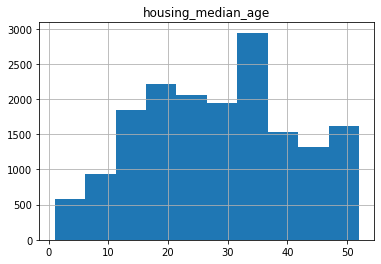

In [ ]:
df.hist('housing_median_age')